<a href="https://colab.research.google.com/github/MonishBajaj/AI-Projects/blob/master/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the dependencies

In [3]:
import numpy as np
import pandas as pd #to read csv in pandas
import matplotlib.pyplot as plt #both down data visualisation
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #to work with categorical data
from imblearn.over_sampling import SMOTE #for inbalanced class distribution , to perform oversampling using imblearn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV #using 3 different methods to split the data to training and test and have cross val;idation
from sklearn.tree import DecisionTreeClassifier #classification problem whether person has autism or not 1 classifier
from sklearn.ensemble import RandomForestClassifier #ensemble model used is random forest 2nd
from xgboost import XGBClassifier #xgboost classifier 3rd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2.Data loading and understanding

In [4]:
#read the csv data to pandas dataframe
df= pd.read_csv('/content/train.csv')


Initial inspection

In [5]:
df.shape

(800, 22)

In [6]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [7]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [8]:
#display all the columns of dataframe
pd.set_option('display.max_columns', None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [10]:
import pandas as pd

#read the csv data to pandas dataframe
df= pd.read_csv('/content/train.csv')

#Convert age column to integer
df["age"]= df["age"].astype(int)

In [11]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [12]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(f'{col}: {df[col].unique()}')
    print("-"*50)

A1_Score: [1 0]
--------------------------------------------------
A2_Score: [0 1]
--------------------------------------------------
A3_Score: [1 0]
--------------------------------------------------
A4_Score: [0 1]
--------------------------------------------------
A5_Score: [1 0]
--------------------------------------------------
A6_Score: [0 1]
--------------------------------------------------
A7_Score: [1 0]
--------------------------------------------------
A8_Score: [0 1]
--------------------------------------------------
A9_Score: [1 0]
--------------------------------------------------
A10_Score: [1 0]
--------------------------------------------------
gender: ['f' 'm']
--------------------------------------------------
ethnicity: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice: ['no' 'yes']
--------------------------------------------

In [13]:
#Dropping ID and age desc column
df= df.drop(columns= ["ID", "age_desc"])

In [14]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [15]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [16]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [17]:
#Define the mapping dict for country names:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
#Replace value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [18]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [19]:
#target class distribution
df["Class/ASD"].value_counts()#As the people with autism to not has great difference, we can do under or over sampling for better result. We will be using SMOT for over sampling

,count
Class/ASD,
0,639
1,161


Insight:
1. missing value in ethenicity and relation
2. age_desc column has one unique  value so it is removed as not imp for prediction
3. fixed country names
4. identified class imbalance in target column

3. Exploratory data analysis(EDA):

In [20]:
df.shape

(800, 20)

In [21]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [22]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [23]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate analysis: analysis based on one variable

For numerical columns:
- age
- result

In [24]:
# Set the desired theme
sns.set_theme(style="darkgrid")

Distribution plots :    using histogram

Mean 27.96375
Median 24.0


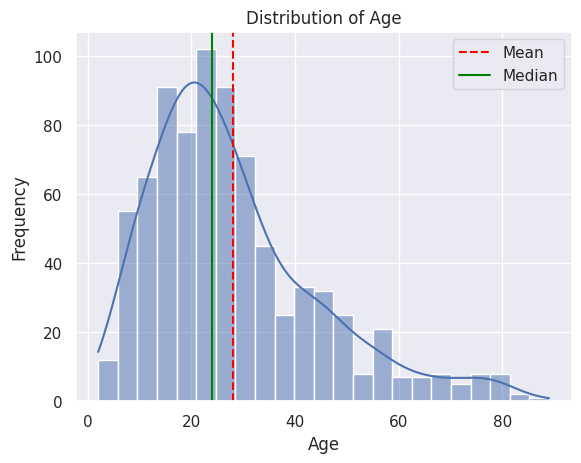

In [25]:
# Histogram for age
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

#Calculate mean and median:
age_mean= df["age"].mean()
age_median= df["age"].median()

print("Mean", age_mean)
print("Median", age_median)

plt.axvline(age_mean, color="red", linestyle="--", label= "Mean")
plt.axvline(age_median, color="green", linestyle="-", label= "Median")
plt.legend()

plt.show()

Mean 8.537303106501248
Median 9.605299308


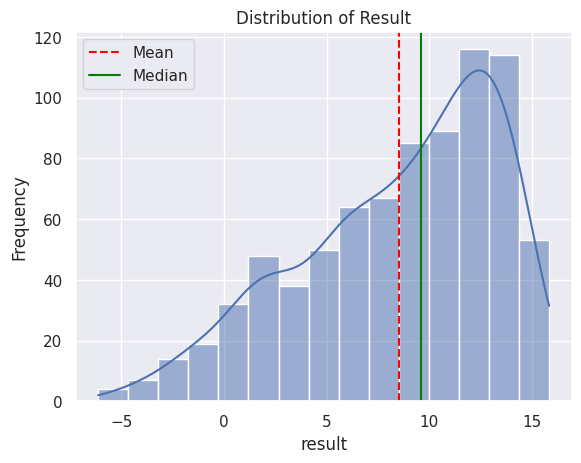

In [26]:
# Histogram for result
sns.histplot(df["result"], kde=True)
plt.title("Distribution of Result")
plt.xlabel("result")
plt.ylabel("Frequency")

#Calculate mean and median:
result_mean= df["result"].mean()
result_median= df["result"].median()

print("Mean", result_mean)
print("Median", result_median)

plt.axvline(result_mean, color="red", linestyle="--", label= "Mean")
plt.axvline(result_median, color="green", linestyle="-", label= "Median")
plt.legend()

plt.show()

box plots for identifying outliers in the numerical columns

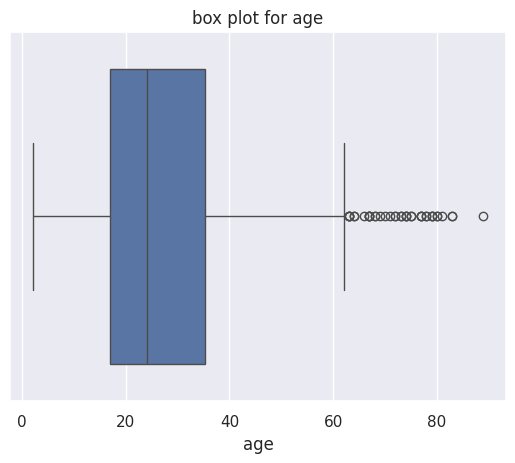

In [27]:
#box plot
sns.boxplot(x=df["age"])
plt.title("box plot for age")
plt.xlabel("age")
plt.show()


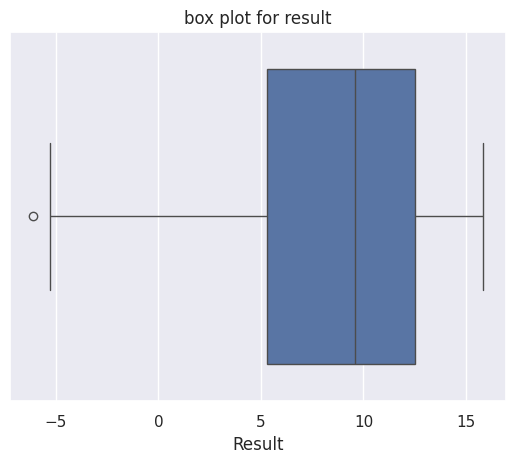

In [28]:
#box plot
sns.boxplot(x=df["result"])
plt.title("box plot for result")
plt.xlabel("Result")
plt.show()

Count the outliers using IQR method:

In [29]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1 - 1.5* IQR
upper_bound= Q3 + 1.5* IQR
age_outliers= df[(df["age"]< lower_bound) | (df["age"]> upper_bound)]




In [30]:
len(age_outliers)

39

In [31]:
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1 - 1.5* IQR
upper_bound= Q3 + 1.5* IQR
result_outliers= df[(df["result"]< lower_bound) | (df["result"]> upper_bound)]
display(result_outliers)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [32]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [33]:
len(result_outliers)

1

Univariate analysis of categorical columns

In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

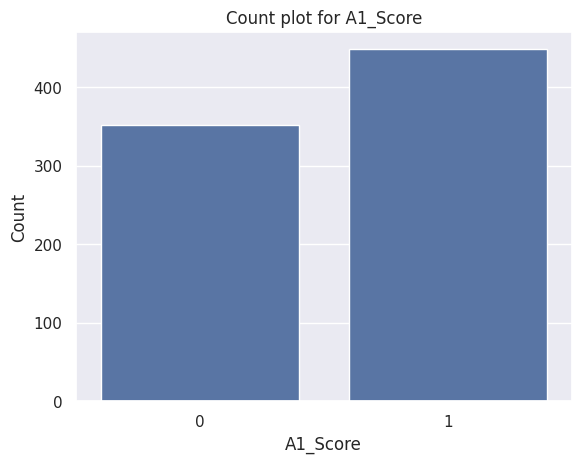

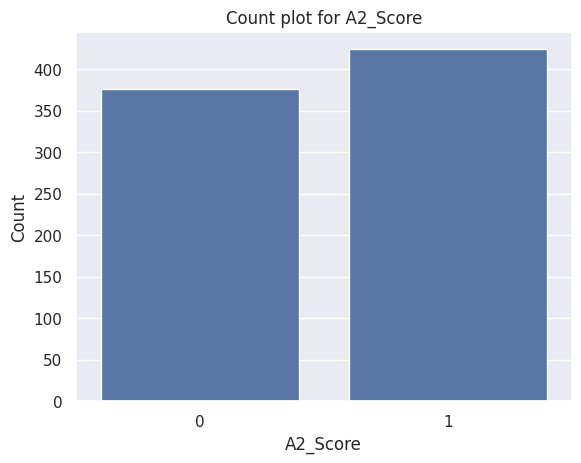

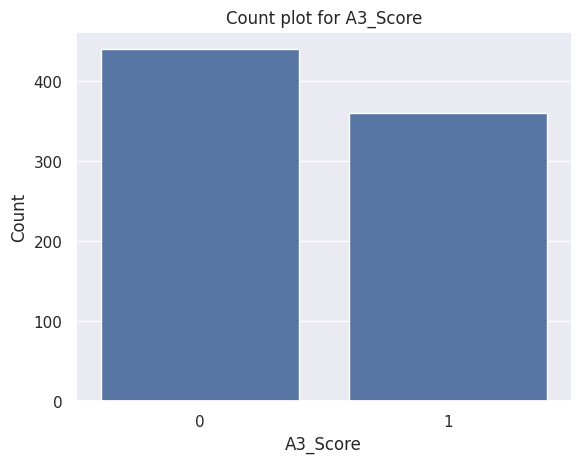

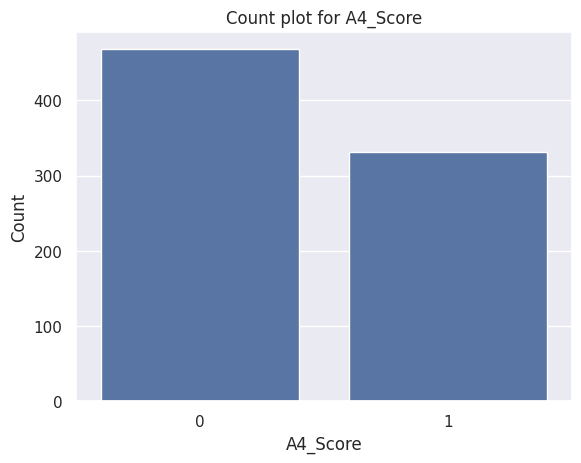

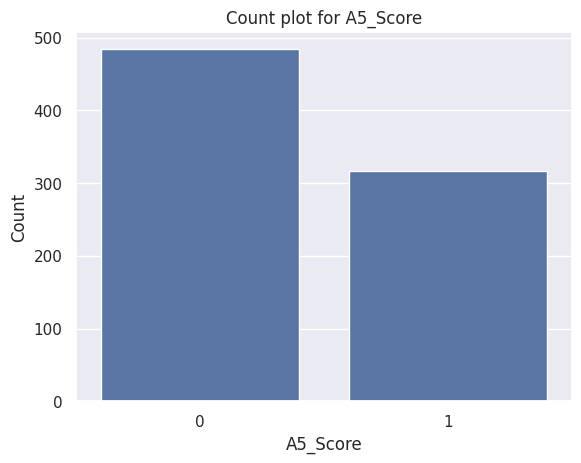

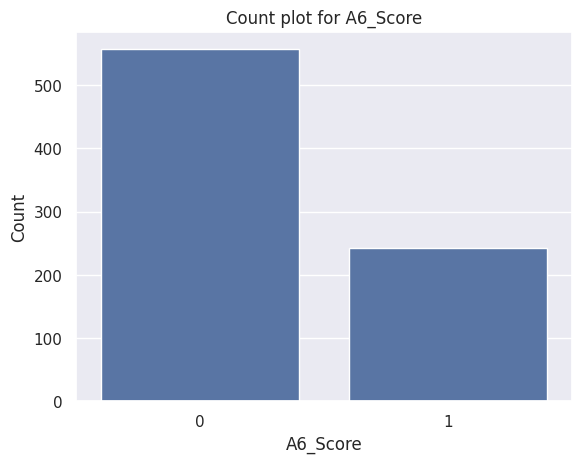

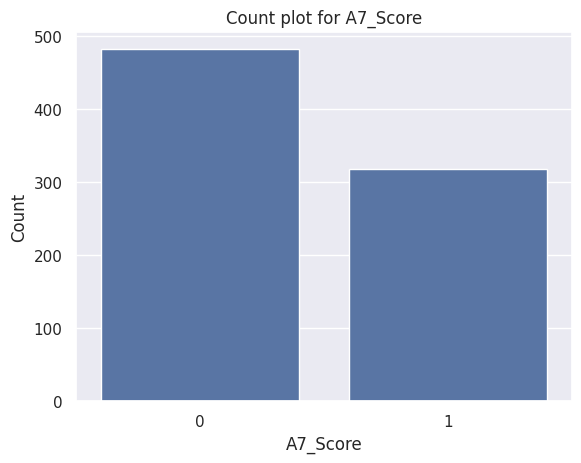

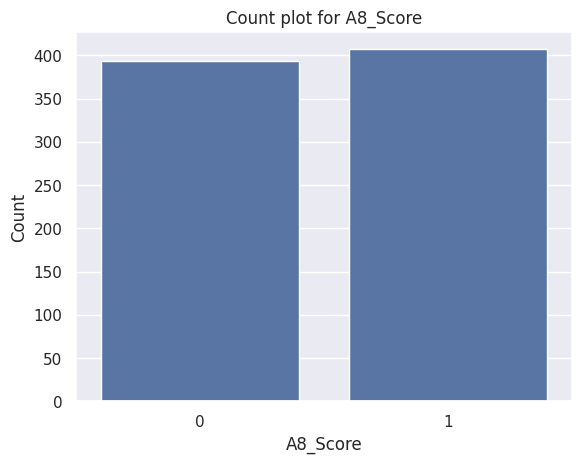

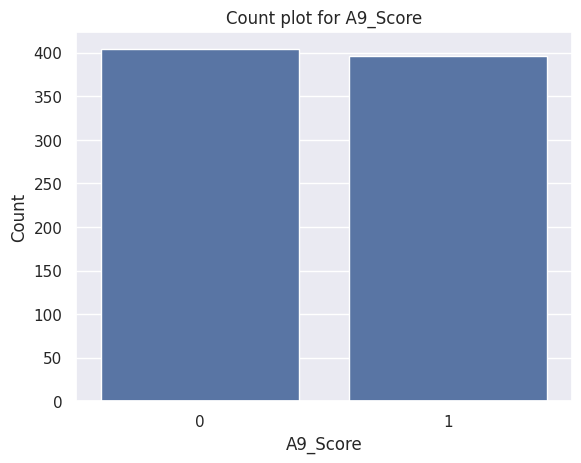

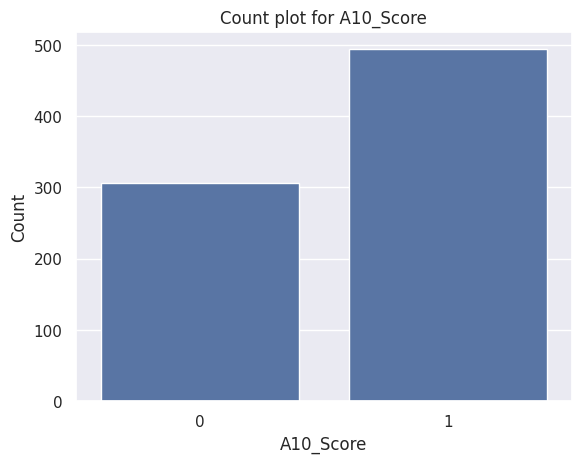

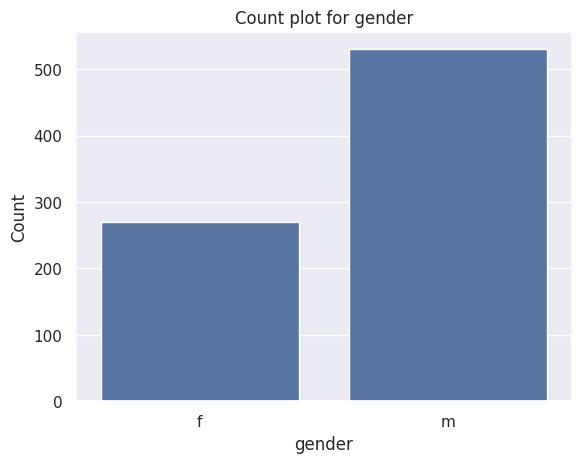

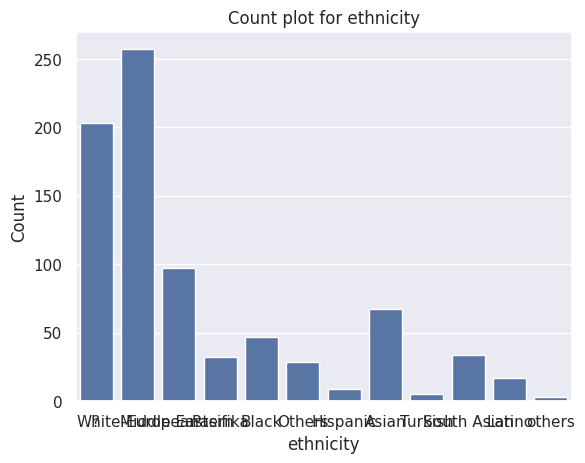

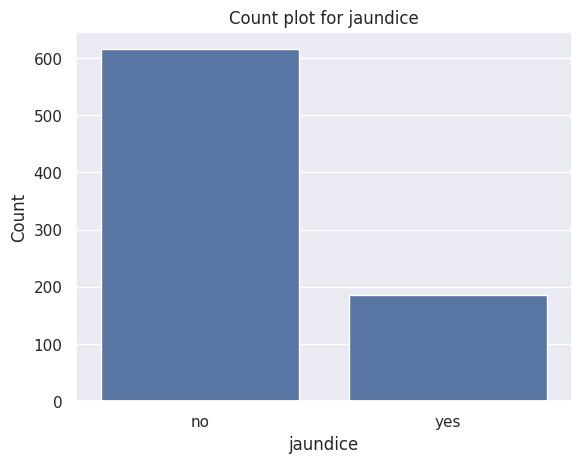

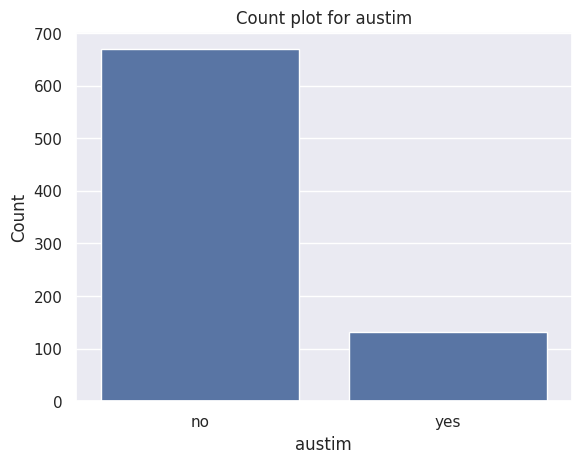

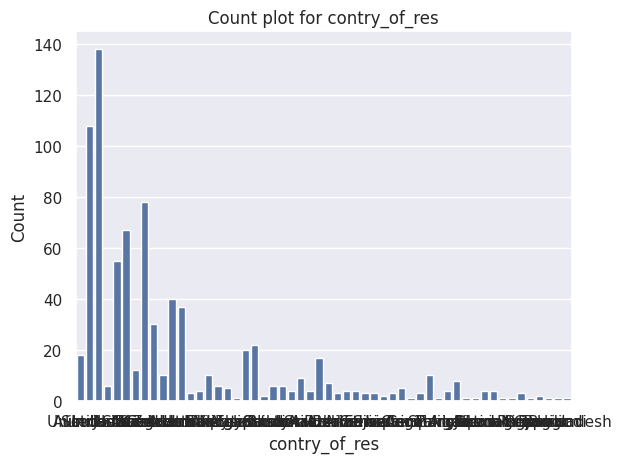

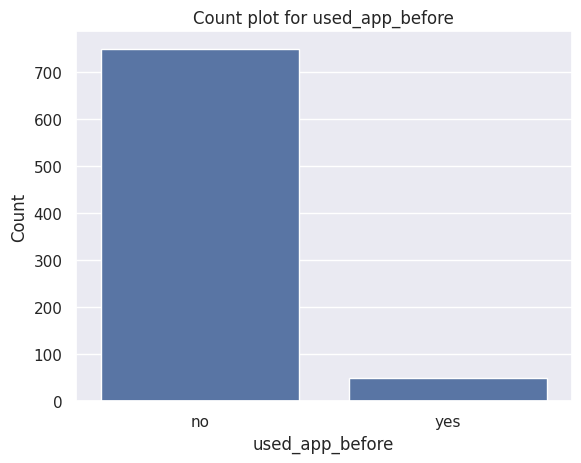

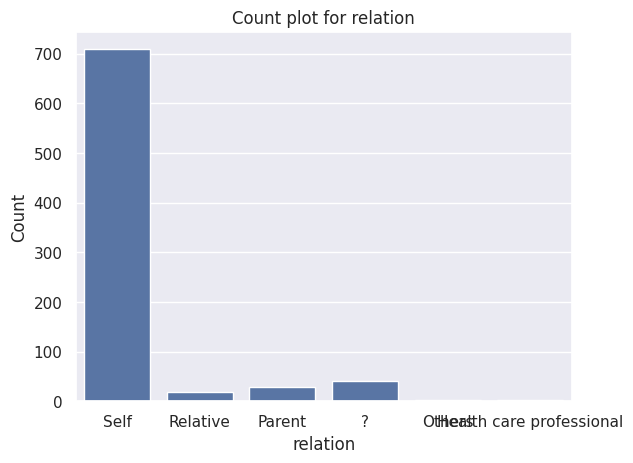

In [35]:
categorical_columns= ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

for  col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

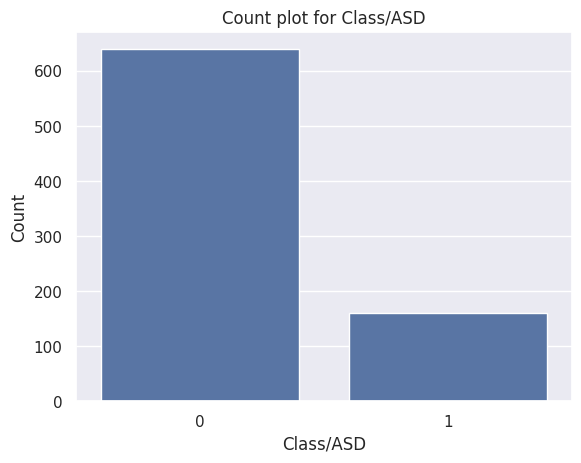

In [36]:
#countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [37]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing value in ethnicity and relation colunmn

In [38]:
df["ethnicity"]= df["ethnicity"].replace({"?":"Others", "others":"Others"})

In [39]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [40]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [41]:
df["relation"]= df["relation"].replace({"?":"Others",
                                        "Relative": "Others",
                                        "Parent": "Others",
                                        "Health care professional": "Others",}
                                       )

In [42]:
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding


In [43]:
#Identify columns with object datatype
object_columns= df.select_dtypes(include= ["object"]).columns

In [44]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [47]:
#initialize the dict to store the encoders
import pickle
encoders={}
#apply label encoding and store the encoders
for column in object_columns:
  label_encoder= LabelEncoder()
  df[column]= label_encoder.fit_transform(df[column])
  encoders[column]= label_encoder #saving the encoder for this column

#save the encoder as pickle file
with open("label_encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [48]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [49]:
df.head()# label encoding with convert into 0-1-.. indexing

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate Analysis

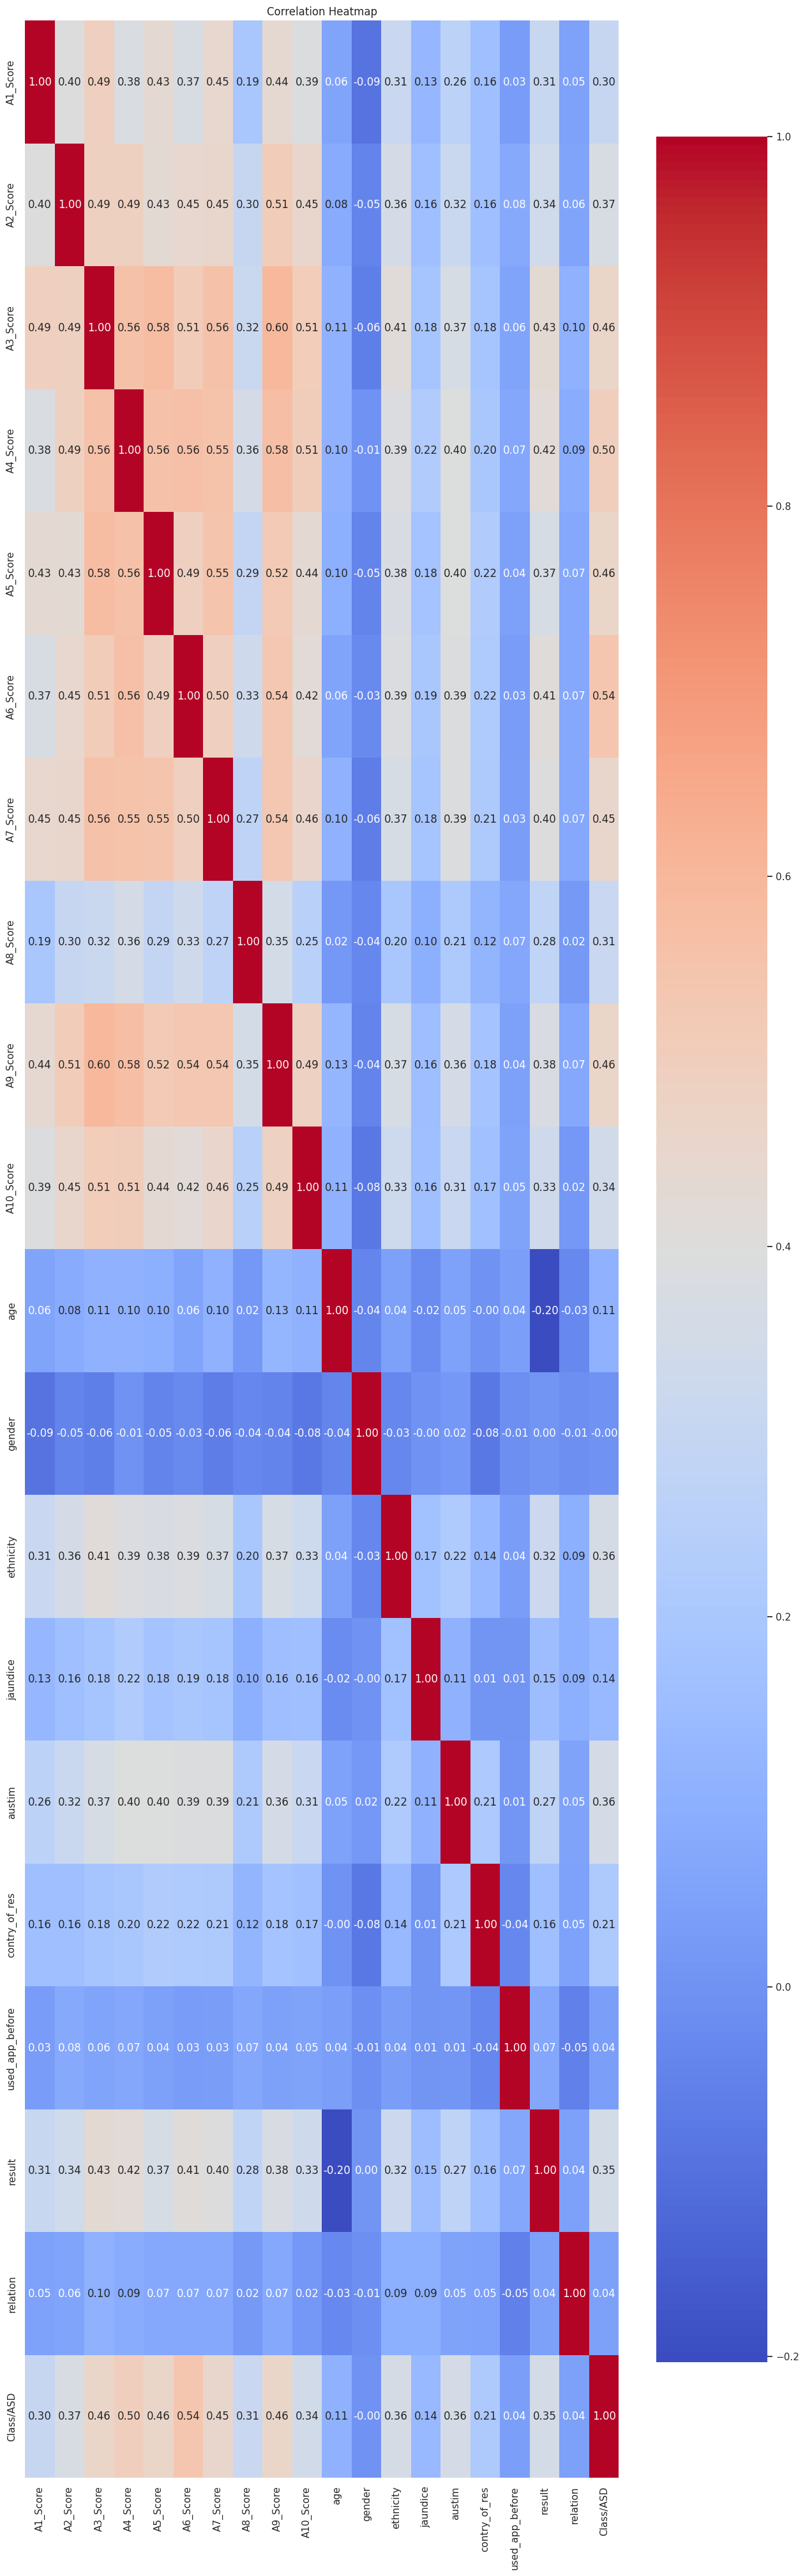

In [51]:
#correlation matrix
plt.figure(figsize=(15,50))
sns.heatmap(df.corr(), annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Correlation Heatmap" )
plt.show()

Insights from EDA :


- There are few outliers in the numerical  columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We dont have any highly correlated columns so we did not drop any  column
- Performed label encoding and saved the encoders

4. Data Preprocessing

Handling the outliers

In [56]:
# Function to replace the outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median= df[column].median()

  #Replace outliers with median value
    df[column]= df[column].apply(lambda x: median if x< lower_bound or x> upper_bound else x)
    return df

In [57]:
#replace outliers in age column
df= replace_outliers_with_median(df, "age")
#replace outliers in age column
df= replace_outliers_with_median(df, "result")

In [58]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [60]:
df.shape

(800, 20)

Train-Test Split

In [61]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [62]:
x= df.drop(columns= ["Class/ASD"])
y= df["Class/ASD"]

In [63]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [65]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [66]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [68]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [69]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [70]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(synthetic minority eversampling technique)

In [71]:
smote = SMOTE(random_state=42)


In [72]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)# not test buyt training data do oversampling

In [73]:
print(y_train_smote.shape)

(1030,)


In [74]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


5. Model **Training**

In [93]:
#list of classifiers
models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "xgboost_Classifier": XGBClassifier(random_state=42)
}

In [80]:
#Dictionary to score the cross validation results
cv_scores =  {}
#Perform cross validation for each model
for model_name, model in models.items():
  print(f"training {model_name} with default parameter")
  scores= cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring= "accuracy")
  cv_scores[model_name]= scores
  print(f"{model_name} cross validation accuracy: {np.mean(scores): .2f} ")
  print("-"*50)

training Decision Tree with default parameter
Decision Tree cross validation accuracy:  0.86 
--------------------------------------------------
training Random Forest with default parameter
Random Forest cross validation accuracy:  0.92 
--------------------------------------------------
training XGBoost with default parameter
XGBoost cross validation accuracy:  0.90 
--------------------------------------------------


In [81]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

6. Model Selection and Hyperparameter tuning

In [96]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [95]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [99]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

#random_search_dt.fit(x_train_smote, y_train_smote)

In [101]:
# fit the models
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [104]:
# print(random_search_dt.best_estimator_)
# print(random_search_dt.best_score_)

# print(random_search_rf.best_estimator_)
# print(random_search_rf.best_score_)


DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
0.8699029126213592
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
0.9271844660194175


In [103]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

